### Mathematical Models II: MA-Process
Moving average models can be used to model dependencies in the noise of a stochastic process. A moving average model of order $q$ (MA(q)-process) is defined as

$$
X_n = W_n + b_1 W_{n-1} + \dots + b_q W_{n-q}
$$

$W_1, W_2, \dots $ is a white noise model with standard deviation $\sigma$. We now will generate an MA(4) Model. We consider the MA(4) process

$$
X_n = W_n + 1.5 W_{n-1} + 1.1 W_{n-2} + W_{n-3} + 0.9 W_{n-4}
$$

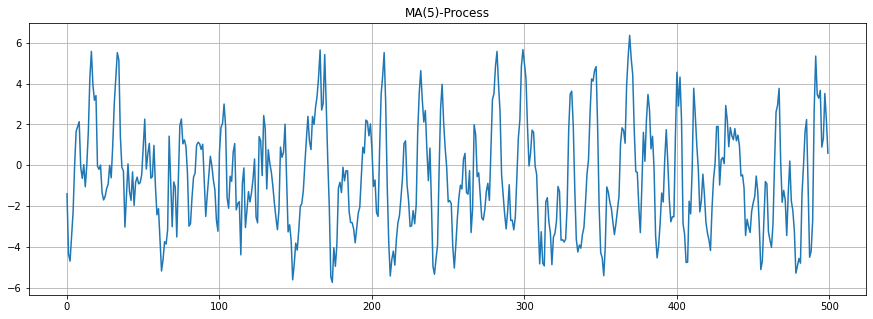

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

ma4 = [1, 1.5, 1.1, 1, 0.9]
model = ArmaProcess(ar = None, ma = ma4)

simulated_data = model.generate_sample(nsample=500)

plt.figure(figsize = (15,5))
plt.plot(simulated_data, '-')
plt.grid()
plt.title("MA(5)-Process")
plt.show()

Moving average processes are always stationary but they are not unique in the sense that two different MA(q) processes can have the same autocorrelation function. Yet, there is always a unique process that is *invertible*. To check if a MA(q)-process is invertible we can investigate the roots of its characteristic polynomial

$$
\Theta(z) = 1 + b_1 z + b_2 z^2 + \dots + b_q z^q
$$

If all roots of $\Theta$ have absolute value larger than $1$, then the process is invertible. 

We check this for our process

In [7]:
model.isinvertible

False

In [8]:
import numpy as np
np.abs(model.maroots)

array([0.92900679, 0.92900679, 1.13464461, 1.13464461])

We finally compute acf and pacf for our process (again, the empirical and the theoretical version). The acf of a MA(q) process vanishes for lags larger than $q$ and the pacf oscillates.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


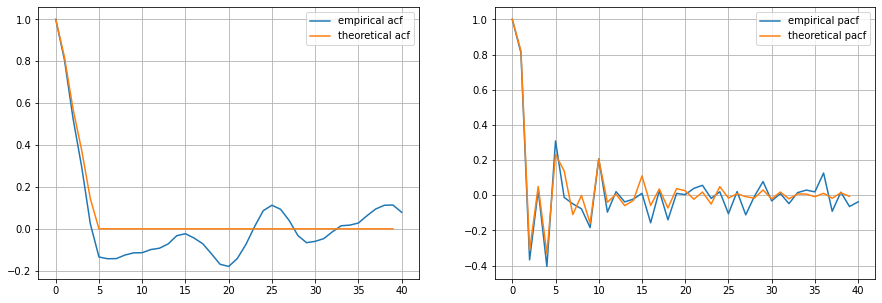

In [9]:
from statsmodels.tsa.stattools import acf, pacf

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(acf(simulated_data, nlags=40), label = "empirical acf")
ax[0].plot(model.acf(lags=40), label = "theoretical acf")
ax[0].legend()
ax[0].grid()

ax[1].plot(pacf(simulated_data, nlags=40), label = "empirical pacf")
ax[1].plot(model.pacf(lags=40), label = "theoretical pacf")
ax[1].legend()
ax[1].grid()